In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
foam = pd.read_csv('full_data.csv')
foam.head()

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions,date,id
0,35.5,26.7,30.2,0.29,0.0,0.0,13.6,281.33,8.0,92.6,85.70,"Rain, Overcast",2019-01-01,1040
1,31.1,27.5,29.3,0.00,0.0,0.0,16.2,215.50,7.5,88.0,82.67,Overcast,2019-01-02,654
2,39.6,25.0,31.9,0.00,0.0,0.0,14.6,220.88,9.7,14.9,75.29,Clear,2019-01-03,752
3,49.5,31.9,38.4,0.00,0.0,0.0,11.3,247.21,9.9,13.4,68.89,Clear,2019-01-04,767
4,53.1,31.6,40.8,0.00,0.0,0.0,14.2,261.75,9.9,27.3,75.09,Partially cloudy,2019-01-05,792


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
X = foam[["Maximum Temperature", "Minimum Temperature", "Temperature", "Precipitation", "Snow", "Snow Depth", "Wind Speed", "Wind Direction", "Visibility", "Cloud Cover", "Relative Humidity"]]
#X = foam[["Maximum Temperature", "Minimum Temperature","Temperature"]]
y = foam["id"].values.reshape(-1, 1)
print(X.shape, y.shape)

(827, 11) (827, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2245217328521545
Testing Score: 0.2743612612202093


Text(0.5, 1.0, 'Residual Plot')

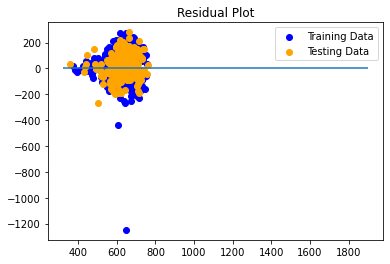

In [15]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")